# Titanic Data Cleaning and Preprocessing


### Step 1: Import Libraries and Explore Basic Info


In [61]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset
df=pd.read_csv("Titanic-Dataset.csv")
print("First 5 rows:")
print(df.head())

# Basic Info
print("\nDataset Info:")
print(df.info())

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Data types and basic stats
print("\nData Description:")
display(df.describe(include='all'))

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Step 2: Handle Missing Values using Mean/Median/Imputation

---



In [62]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

print("Missing values handled successfully.")
print(df.isnull().sum())

Missing values handled successfully.
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Step 3: Convert Categorical Features into Numerical using Encoding

In [67]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

### Step 4: Normalize/Standardize Numerical Features

In [68]:
scaler = StandardScaler()

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Do not scale target variable 'Survived' if present
numeric_cols = [col for col in numeric_cols if col != 'Survived']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Numerical features standardized.")
df.head()

Numerical features standardized.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.585954
1,1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.942303
2,1,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.585954
3,1,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.585954
4,0,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.585954


### Step 5: Visualize outliers using boxplots and remove them

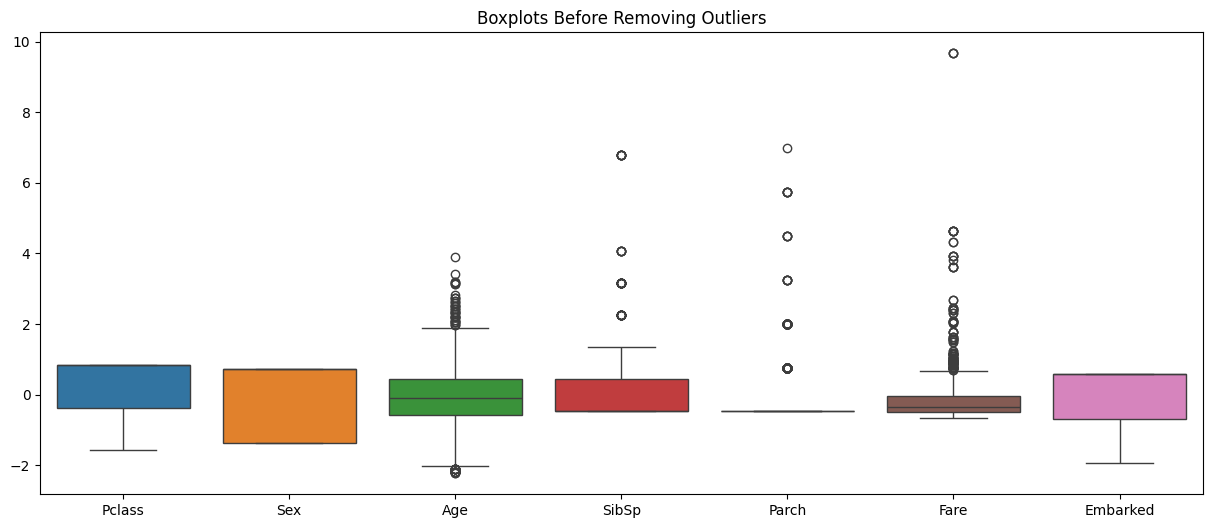

In [69]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots Before Removing Outliers")
plt.show()


Outliers removed using IQR method.


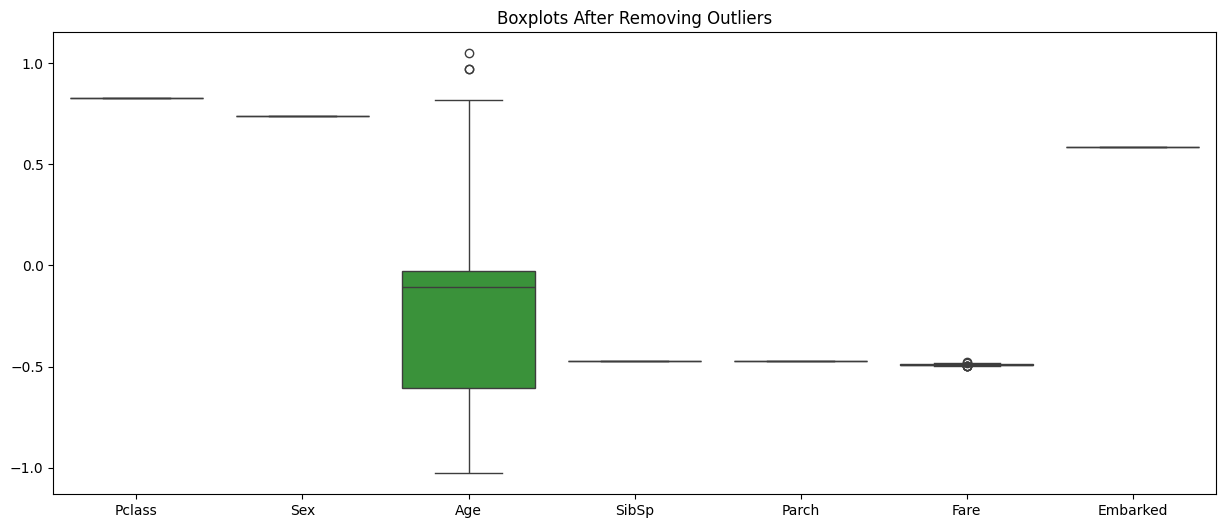

Final dataset shape: (115, 8)


In [72]:
# Remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\nOutliers removed using IQR method.")

plt.figure(figsize=(15,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots After Removing Outliers")
plt.show()

print(f"Final dataset shape: {df.shape}")

### Step 6: Save the Cleaned Dataset

In [74]:
df.to_csv("titanic_cleaned.csv", index=False)
print("Cleaned dataset saved as titanic_cleaned.csv")


Cleaned dataset saved as titanic_cleaned.csv
